In [1]:
try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio # -U stands for "upgrade" so we'll get the latest version by default
  import datasets, evaluate, accelerate
  import gradio as gr

import random

import numpy as np
import pandas as pd

import torch
import transformers

print(f"Using transformers version: {transformers.__version__}")
print(f"Using datasets version: {datasets.__version__}")
print(f"Using torch version: {torch.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6

In [12]:
import pandas as pd
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
from datasets import load_dataset

dataset = datasets.load_dataset("gokulan006/reddit_post_risk_analysis")
dataset

README.md:   0%|          | 0.00/318 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/52680 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['statement', 'status'],
        num_rows: 52680
    })
})

In [8]:
dataset=dataset['train']
dataset.to_csv("risk_analysis.csv",index=False)

Creating CSV from Arrow format:   0%|          | 0/53 [00:00<?, ?ba/s]

31139219

In [9]:
# Load Dataset
df = pd.read_csv("risk_analysis.csv")
df.head()

,statement,status
0,oh my gosh,Mid-Risk
1,"trouble sleeping, confused mind, restless hear...",Mid-Risk
2,"All wrong, back off dear, forward doubt. Stay ...",Mid-Risk
3,I've shifted my focus to something else but I'...,Mid-Risk
4,"I'm restless and restless, it's been a month n...",Mid-Risk


In [10]:
df['status'].value_counts()

,count
status,
Mid-Risk,21832
Low-Risk,16343
High-Rsik,14505


In [13]:
# Label Encoding
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df['status'].value_counts()

,count
status,
2,21832
1,16343
0,14505


In [14]:
# Split Data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["statement"].to_numpy(), df["status"].to_numpy(), test_size=0.2, random_state=42
)
len(train_texts), len(test_texts), len(train_labels), len(test_labels)

(42144, 10536, 42144, 10536)

In [ ]:
# Tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_data(texts, max_len=128):
    return tokenizer(
        list(texts),
        max_length=max_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

train_encodings = tokenize_data(train_texts)
test_encodings = tokenize_data(test_texts)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [15]:
from transformers import DistilBertTokenizer, TFDistilBertModel
import tensorflow as tf

base_model = TFDistilBertModel.from_pretrained("distilbert-base-uncased")


# Define Model Architecture
input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

# DistilBERT Embeddings
distilbert_output = base_model(input_ids, attention_mask=attention_mask)[0]

# BiLSTM Layer
bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True))(distilbert_output)


def attention_block(inputs):
    query = tf.keras.layers.Dense(128, activation="relu")(inputs)
    key = tf.keras.layers.Dense(128, activation="relu")(inputs)
    value = tf.keras.layers.Dense(128, activation="relu")(inputs)
    attention_output = tf.keras.layers.Attention()([query, key, value])
    return attention_output

attention_output = attention_block(bi_lstm)

# CNN Layer
cnn_output = tf.keras.layers.Conv1D(128, kernel_size=3, activation="relu")(attention_output)
cnn_output = tf.keras.layers.GlobalMaxPooling1D()(cnn_output)

# Fully Connected Layers
dense = tf.keras.layers.Dense(64, activation="relu")(cnn_output)
dropout = tf.keras.layers.Dropout(0.3)(dense)
output = tf.keras.layers.Dense(3, activation="softmax")(dropout)  # 3 classes: Low, Moderate, High

# Build Model
model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compile Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

print(model.summary())

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_model (TFDi  TFBaseModelOutput(last_hid   6636288   ['input_ids[0][0]',           
 stilBertModel)              den_state=(None, 128, 768)   0          'attention_mask[0][0]']      
                             , hidden_states=None, atte                                       

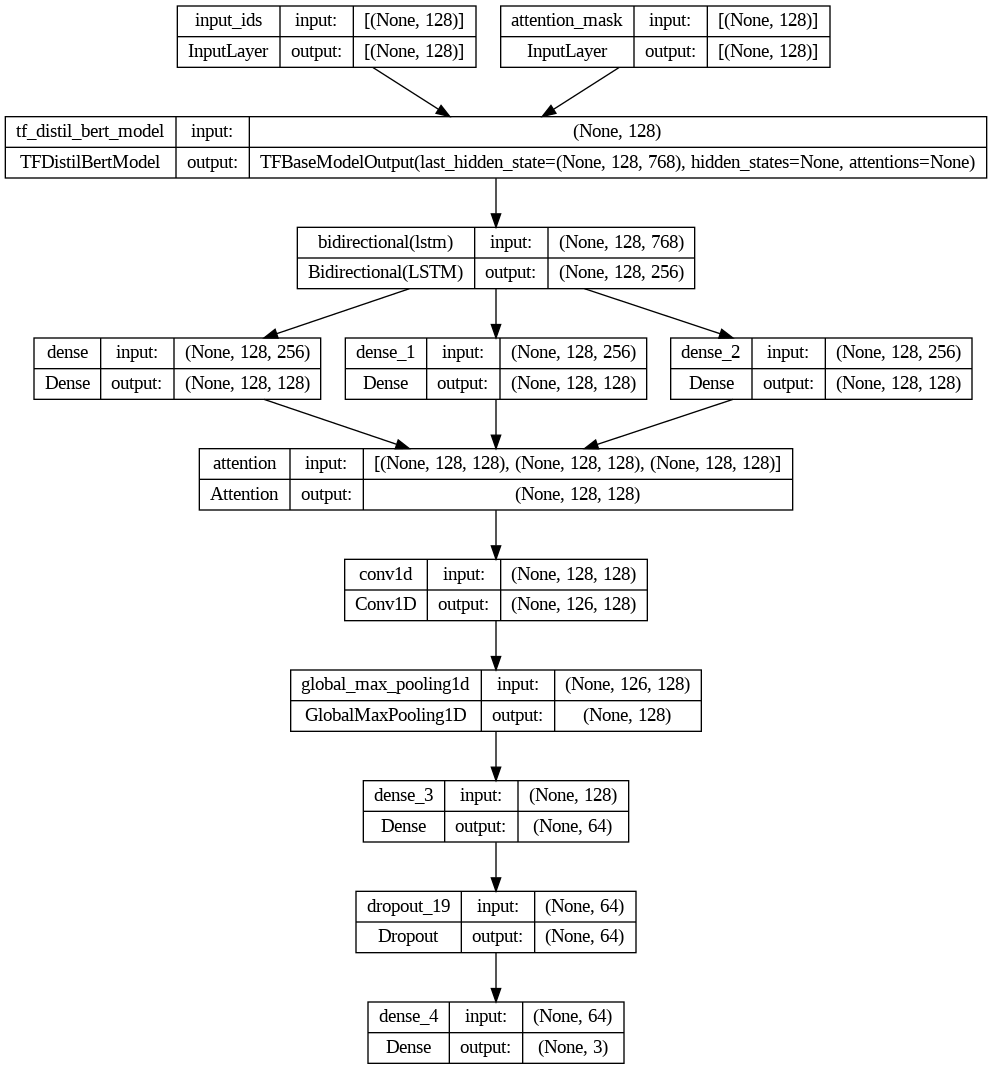

In [16]:
# plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Train Model
train_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"]},
    train_labels
)).shuffle(1000).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((
    {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]},
    test_labels
)).batch(32)

history = model.fit(train_dataset, validation_data=test_dataset, epochs=3)

Epoch 1/3
1317/1317 [==============================] - 624s 456ms/step - loss: 0.5017 - accuracy: 0.7734 - val_loss: 0.4100 - val_accuracy: 0.8039
Epoch 2/3
1317/1317 [==============================] - 598s 454ms/step - loss: 0.3676 - accuracy: 0.8349 - val_loss: 0.3823 - val_accuracy: 0.8175
Epoch 3/3
1317/1317 [==============================] - 597s 453ms/step - loss: 0.2899 - accuracy: 0.8772 - val_loss: 0.3785 - val_accuracy: 0.8350


In [ ]:
from sklearn.metrics import classification_report
y_preds=model.predict(test_dataset)
y_preds=tf.argmax(y_preds,axis=1)

print(classification_report(test_labels,y_preds,labels=[0,1,2],target_names={"High-Risk","Low-Risk","Mid-Risk"}))

330/330 [==============================] - 49s 143ms/step
              precision    recall  f1-score   support

   High-Risk       0.75      0.70      0.72      2869
    Mid-Risk       0.97      0.94      0.95      3325
    Low-Risk       0.78      0.84      0.81      4342

    accuracy                           0.83     10536
   macro avg       0.83      0.82      0.83     10536
weighted avg       0.83      0.83      0.83     10536



In [ ]:
save_dir = "risk_model_package"
os.makedirs(save_dir, exist_ok=True)

# Save model (TF SavedModel format)
model.save(f"{save_dir}/model", save_format="tf")

# Save tokenizer
tokenizer.save_pretrained(f"{save_dir}/tokenizer")

# Save label encoder
joblib.dump(le, f"{save_dir}/label_encoder.joblib")

# Save metadata
with open(f"{save_dir}/metadata.txt", "w") as f:
    f.write(f"Classes: {le.classes_.tolist()}\n")
    f.write(f"Max sequence length: 128\n")
    f.write(f"Last validation accuracy: {history.history['val_accuracy'][-1]:.4f}\n")


In [ ]:
!zip -r risk_model_package.zip /content/risk_model_package/

  adding: content/risk_model_package/ (stored 0%)
  adding: content/risk_model_package/metadata.txt (deflated 7%)
  adding: content/risk_model_package/model/ (stored 0%)
  adding: content/risk_model_package/model/assets/ (stored 0%)
  adding: content/risk_model_package/model/saved_model.pb (deflated 91%)
  adding: content/risk_model_package/model/fingerprint.pb (stored 0%)
  adding: content/risk_model_package/model/variables/ (stored 0%)
  adding: content/risk_model_package/model/variables/variables.index (deflated 77%)
  adding: content/risk_model_package/model/variables/variables.data-00000-of-00001 (deflated 16%)
  adding: content/risk_model_package/model/keras_metadata.pb (deflated 94%)
  adding: content/risk_model_package/label_encoder.joblib (deflated 28%)
  adding: content/risk_model_package/tokenizer/ (stored 0%)
  adding: content/risk_model_package/tokenizer/special_tokens_map.json (deflated 42%)
  adding: content/risk_model_package/tokenizer/tokenizer_config.json (deflated 75

In [ ]:
from google.colab import files
files.download('risk_model_package.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from transformers import DistilBertTokenizer
import joblib

# 1. Load your saved components
def load_risk_model(model_dir="risk_model_package"):
    tokenizer = DistilBertTokenizer.from_pretrained(f"{model_dir}/tokenizer")
    le = joblib.load(f"{model_dir}/label_encoder.joblib")
    model = tf.keras.models.load_model(
        f"{model_dir}/model",
        custom_objects={
            "TFDistilBertModel": TFDistilBertModel,
            "Attention": tf.keras.layers.Attention
        }
    )
    return model, tokenizer, le

# 2. Prediction function with proper padding
def predict_risk(text, model, tokenizer, le, max_length=128):
    # Tokenize with fixed length
    inputs = tokenizer(
        text,
        max_length=max_length,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    # Convert to model's expected input format
    input_dict = {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"]
    }

    # Get predictions
    probs = model.predict(input_dict)
    predicted_class = le.inverse_transform([tf.argmax(probs, axis=-1).numpy()[0]])[0]
    return predicted_class, probs

# 3. Usage example
model, tokenizer, le = load_risk_model()
text = "This is a sample risk statement that needs classification"

# Get prediction
class_label, probabilities = predict_risk(text, model, tokenizer, le)
print(f"Predicted class: {class_label}")
print(f"Class probabilities: {probabilities}")

1/1 [==============================] - 2s 2s/step
Predicted class: Low-Risk
Class probabilities: [[0.02210293 0.85064226 0.12725483]]


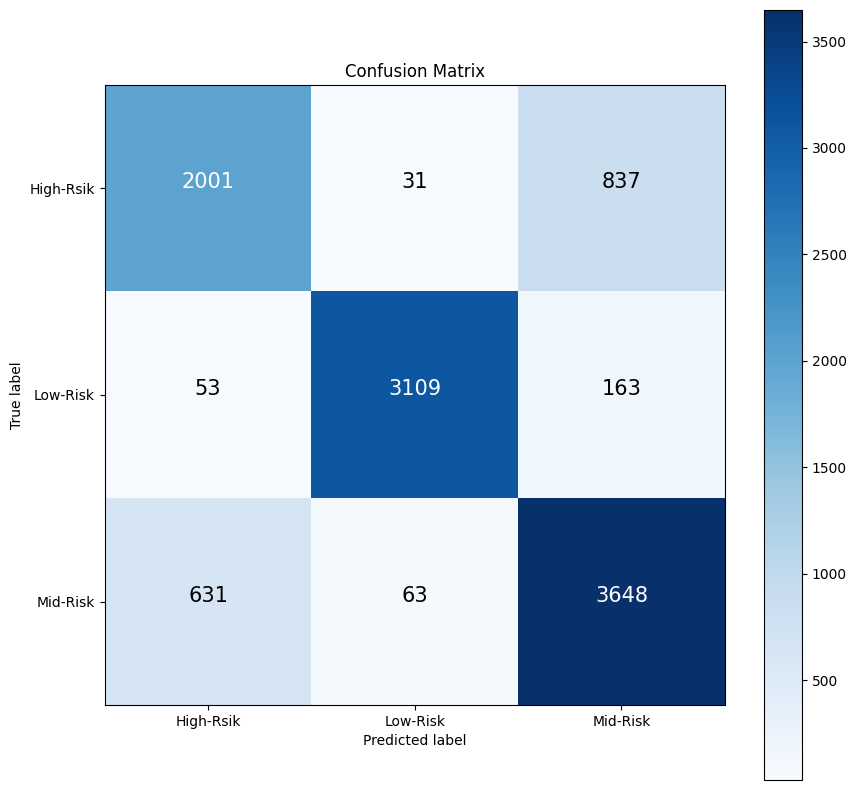

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  # Check if classes is not None and has elements before assigning labels
  if classes is not None and len(classes) > 0:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

make_confusion_matrix(test_labels,y_preds,classes=le.classes_)

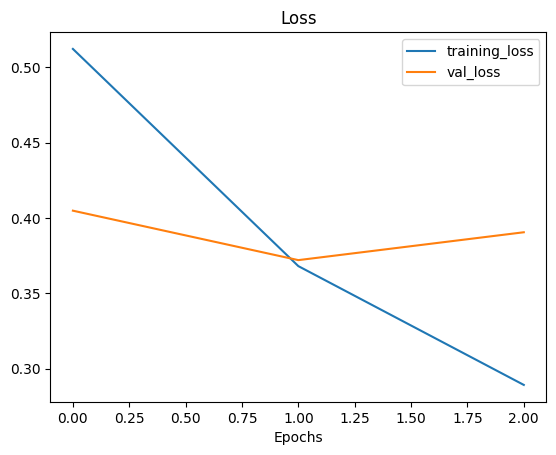

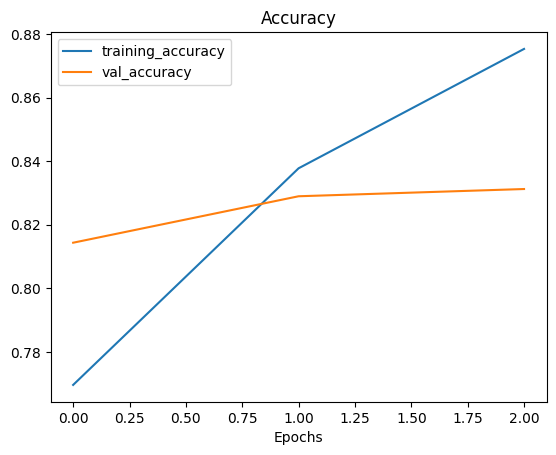

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

plot_loss_curves(history)